In [46]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
import torch
import pyperlin
from GNEMS import *

In [5]:
shape = (10,512,512) #for batch size = 1 and noises' shape = (256,256)
l = 2
persistances = np.arange(0.1, 1.1, 0.1)

generator = torch.Generator()

for p in persistances:
    generator.manual_seed(0)
    resolutions = [(l**i,l**i) for i in range(1,7)] #for lacunarity = 2.0
    factors = [p**i for i in range(6)] #for persistence = 0.5
    fp = pyperlin.FractalPerlin2D(shape, resolutions, factors, generator=generator)
    noise = fp() #sampling
    noise = noise.numpy()
    noise = (noise > threshold_otsu(noise)).astype(int)
    for i,generation in enumerate(noise):
        plt.imsave(f"edge_complexity_test_images/perlin_{p:.1f}_{i:03d}.png", generation, cmap="gray")

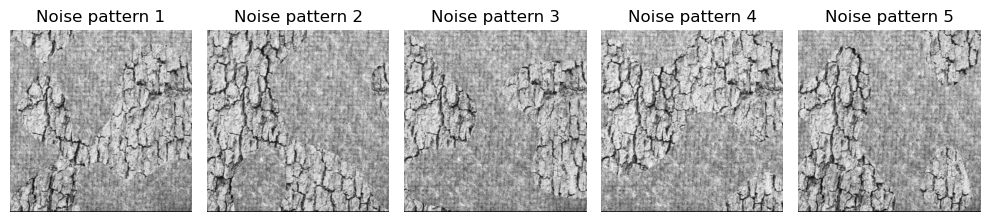

In [96]:
texture1 = plt.imread("textures/1.1.05.tiff")
texture2 = plt.imread("textures/1.1.02.tiff")

index = 3
index_str = f'{index:03d}'
images = []
persistences = np.arange(0.1, 1.1, 0.2)
for i in range(5):
    images.append(plt.imread(f'edge_complexity_test_images/perlin_0.1_{i:03d}.png'))

fig, axs = plt.subplots(1, 5, figsize=(10, 2.5))
for i,ax in enumerate(axs):
    # add random noise to the image
    # images[i] = util.random_noise(images[i][:,:,0], mode='gaussian', seed=0, clip=False, var=1)
    # images[i] -= images[i].min()
    # images[i] /= images[i].max()
    blended = images[i][:,:,0] * texture1 + (1-images[i][:,:,0]) * texture2
    ax.imshow(blended, cmap="gray")
    ax.set_title(f'Noise pattern {i+1}')
    ax.axis("off")
    ax.patch.set_facecolor('none')
plt.tight_layout()
plt.savefig("../Draft/graphics/perlin_noise_brodatz.pdf", transparent=True)
plt.show()

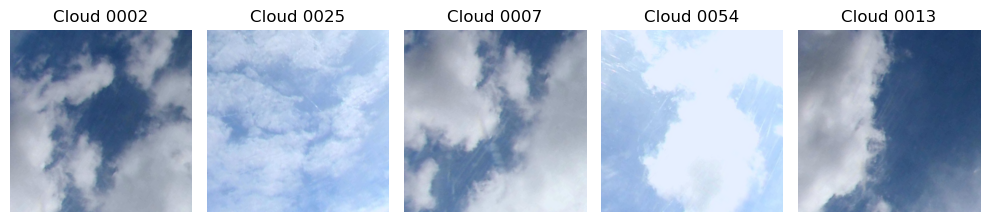

In [103]:
best_clouds = ["0002", "0025", "0007", "0054", "0013"]
fig, axs = plt.subplots(1, 5, figsize=(10, 2.5))
for i,ax in enumerate(axs):
    clouds = plt.imread(f'../../../../Downloads/swimseg/images/{best_clouds[i]}.png')
    ax.imshow(clouds, cmap="gray")
    ax.set_title(f'Cloud {best_clouds[i]}')
    ax.axis("off")
    ax.patch.set_facecolor('none')
plt.tight_layout()
plt.savefig("../Draft/graphics/swimseg.pdf", transparent=True)
plt.show()

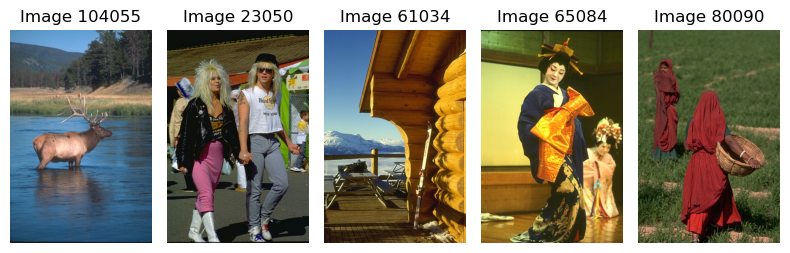

In [107]:
best_clouds = ["104055", "23050", "61034", "65084", "80090"]
fig, axs = plt.subplots(1, 5, figsize=(8, 2.5))
for i,ax in enumerate(axs):
    clouds = plt.imread(f'../../../../Documents/Classes Fall 2022/CIS 520/Final Project/project/BSDS500/BSDS500/data/images/test/{best_clouds[i]}.jpg')
    ax.imshow(clouds, cmap="gray")
    ax.set_title(f'Image {best_clouds[i]}')
    ax.axis("off")
    ax.patch.set_facecolor('none')
plt.tight_layout()
plt.savefig("../Draft/graphics/BSDS500.pdf", transparent=True)
plt.show()